In [1]:
## This file is to tests pytorch differentiable modules
import torch
from torch.autograd import Function

from matplotlib import pyplot as plt

In [204]:
class Square(Function):
    
    @staticmethod
    def forward(ctx, input):
        
        ctx.save_for_backward(input)
        
        return input * input
    
    @staticmethod
    def backward(ctx, grad):
        
        input = ctx.saved_tensors
        
        return grad * input * 2

In [205]:
class LinearLayer(Function):
    
    @staticmethod
    def forward(ctx, input, weight):
        
        ctx.save_for_backward(input, weight)
        return weight.t()*input
    
    @staticmethod
    def backward(ctx, grad):
        
        input, weigth = ctx.saved_tensors
        return grad * weigth , grad * input 
    

In [206]:
class Regressor(torch.nn.Module):
    
    def __init__(self, input_features, output_features):
        
        super(Regressor, self).__init__()
        
        self.weight = torch.nn.Parameter(torch.ones(output_features, input_features))
        
    def forward(self, input):
        
        weight = Square.apply(self.weight)
        x = LinearLayer.apply(input, weight)
        return x
    

In [207]:
nb_data = 15
slope = 50
x = torch.linspace(1,15,nb_data).reshape(-1,1)
y = slope*torch.square(torch.linspace(1,15,nb_data)).reshape(-1,1)

In [208]:
nn = Regressor(1, 1)
loss_fn = torch.nn.MSELoss()

lr = 5e+1
eps = 50
optimizer = torch.optim.Adam(nn.parameters(), lr=lr)

for i in range(eps):
    
    y_pred = nn(x)
    loss = loss_fn(y_pred, y)
#     print( "loss: ", loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

TypeError: only integer tensors of a single element can be converted to an index

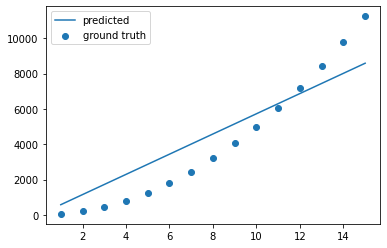

In [199]:
guess = (nn(x).reshape(15)).detach().numpy()
plt.plot(x.reshape(nb_data),guess, label = "predicted")
plt.scatter(x.reshape(nb_data),y.reshape(nb_data), label = "ground truth")
plt.legend()
plt.show()